## Lab 7.03 | Handling Data Imbalance in Classification Models

Importing the correct librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

Importing the correct datasets

In [2]:
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
targets = pd.read_csv('target.csv')

Checking to see if there are any Null values for all of the datasets

In [3]:
numerical.isna().sum()

TCODE       0
AGE         0
INCOME      0
WEALTH1     0
HIT         0
           ..
AVGGIFT     0
CONTROLN    0
HPHONE_D    0
RFA_2F      0
CLUSTER2    0
Length: 315, dtype: int64

In [4]:
categorical.isna().sum()

STATE           0
CLUSTER         0
HOMEOWNR        0
GENDER          0
DATASRCE        0
RFA_2R          0
RFA_2A          0
GEOCODE2        0
DOMAIN_A        0
DOMAIN_B        0
ODATEW_YR       0
ODATEW_MM       0
DOB_YR          0
DOB_MM          0
MINRDATE_YR     0
MINRDATE_MM     0
MAXRDATE_YR     0
MAXRDATE_MM     0
LASTDATE_YR     0
LASTDATE_MM     0
FIRSTDATE_YR    0
FIRSTDATE_MM    2
dtype: int64

In [5]:
targets.dtypes

TARGET_B      int64
TARGET_D    float64
dtype: object

#### Numerical Columns

Scaling the numerical values for them to be later transformed using SelectKBest

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numerical)
numerical_scaled.shape

(95412, 315)

In [7]:
X = numerical_scaled
y = targets['TARGET_B']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
model = SelectKBest(chi2,k=20).fit(X, y)

kbest = model.transform(X)

df1 = pd.DataFrame(data = model.scores_, columns = ['score'])
df1['Column'] =  numerical.columns
df1_sorted = df1.sort_values(by=['score'],ascending = False).head(20)


kbest = pd.DataFrame(kbest, columns = df1_sorted.Column.tolist())
kbest.head(5)

,RFA_2F,CARDGIFT,HVP1,HVP2,HVP3,HVP6,HVP4,ETH2,RP1,RP2,NGIFTALL,HV1,HV2,ETHC5,ETHC4,CARDPROM,NUMPROM,RP3,HVP5,CLUSTER2
0,0.010101,0.079833,0.105833,0.000000,0.000000,0.020202,0.070707,0.131313,0.272727,0.474747,0.000000,0.020202,0.050505,0.171717,0.433333,0.366492,0.127119,0.341463,1.000000,0.622951
1,0.000000,0.911333,0.869667,0.000000,0.000000,0.979798,0.989899,0.989899,0.989899,1.000000,0.949495,0.919192,0.919192,0.919192,0.183333,0.146597,0.008475,0.024390,0.333333,0.000000
2,0.020202,0.082833,0.091000,0.000000,0.010101,0.000000,0.010101,0.060606,0.181818,0.505051,0.000000,0.000000,0.020202,0.090909,0.416667,0.308901,0.110169,0.341463,1.000000,0.967213
3,0.000000,0.166667,0.210500,0.000000,0.000000,0.101010,0.252525,0.505051,0.696970,0.929293,0.101010,0.010101,0.080808,0.171717,0.433333,0.324607,0.063559,0.170732,1.000000,0.655738
4,0.989899,0.096000,0.099000,0.381818,0.585859,0.000000,0.010101,0.020202,0.161616,0.676768,0.000000,0.252525,0.585859,0.747475,0.700000,0.570681,0.152542,0.195122,0.333333,0.409836


According to KBest, these models with low variance should be deleted 

In [8]:
df1_sorted

,score,Column
313,210.290810,RFA_2F
305,27.516508,CARDGIFT
110,26.474583,HVP1
111,25.757492,HVP2
112,21.545080,HVP3
115,19.261394,HVP6
113,14.874056,HVP4
22,13.034181,ETH2
129,12.581538,RP1
130,11.022637,RP2


In [9]:
df_kbest = model.transform(numerical)
df_kbest.tolist()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


[[1.0,
  479.0,
  635.0,
  0.0,
  0.0,
  2.0,
  7.0,
  13.0,
  27.0,
  47.0,
  0.0,
  2.0,
  5.0,
  17.0,
  27.0,
  74.0,
  31.0,
  14.0,
  4.0,
  39.0],
 [0.0,
  5468.0,
  5218.0,
  0.0,
  0.0,
  97.0,
  98.0,
  98.0,
  98.0,
  99.0,
  94.0,
  91.0,
  91.0,
  91.0,
  12.0,
  32.0,
  3.0,
  1.0,
  2.0,
  1.0],
 [2.0,
  497.0,
  546.0,
  0.0,
  1.0,
  0.0,
  1.0,
  6.0,
  18.0,
  50.0,
  0.0,
  0.0,
  2.0,
  9.0,
  26.0,
  63.0,
  27.0,
  14.0,
  4.0,
  60.0],
 [0.0,
  1000.0,
  1263.0,
  0.0,
  0.0,
  10.0,
  25.0,
  50.0,
  69.0,
  92.0,
  10.0,
  1.0,
  8.0,
  17.0,
  27.0,
  66.0,
  16.0,
  7.0,
  4.0,
  41.0],
 [98.0,
  576.0,
  594.0,
  21.0,
  58.0,
  0.0,
  1.0,
  2.0,
  16.0,
  67.0,
  0.0,
  25.0,
  58.0,
  74.0,
  43.0,
  113.0,
  37.0,
  8.0,
  2.0,
  26.0],
 [6.0,
  807.0,
  899.0,
  1.0,
  4.0,
  3.0,
  9.0,
  31.0,
  56.0,
  84.0,
  1.0,
  5.0,
  21.0,
  56.0,
  15.0,
  35.0,
  4.0,
  3.0,
  1.0,
  16.0],
 [0.0,
  484.0,
  519.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  11.0,

Columns recommended to be deleted

In [10]:
df1_sorted[df1_sorted.score > df1_sorted.score.mean()]

,score,Column
313,210.290810,RFA_2F
305,27.516508,CARDGIFT
110,26.474583,HVP1
111,25.757492,HVP2


In [11]:
target_col = ["TARGET_B"]
cols = kbest.columns.tolist()
cols = cols + target_col
df1_corr = pd.concat([numerical[numerical.columns.intersection(cols)], targets.TARGET_B], axis = 1).corr()
df1_corr

,ETH2,HV1,HV2,ETHC4,ETHC5,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,RP1,RP2,RP3,CARDPROM,NUMPROM,NGIFTALL,CARDGIFT,RFA_2F,CLUSTER2,TARGET_B
ETH2,1.000000,-0.150722,-0.158032,0.953195,0.989670,-0.122747,-0.141525,-0.178212,-0.209605,-0.226967,-0.096166,-0.157844,-0.158384,-0.147812,-0.038738,-0.041903,-0.042072,-0.053205,-0.027754,0.166041,-0.019040
HV1,-0.150722,1.000000,0.993412,-0.170230,-0.139150,0.924447,0.895115,0.812556,0.711825,0.554888,0.906695,0.689504,0.618017,0.514985,-0.040233,-0.028284,-0.061483,-0.054503,-0.051548,-0.569699,0.025012
HV2,-0.158032,0.993412,1.000000,-0.178188,-0.146567,0.932601,0.911005,0.836047,0.736363,0.574134,0.902442,0.696445,0.626613,0.523472,-0.041306,-0.028821,-0.062982,-0.055636,-0.053175,-0.579342,0.025607
ETHC4,0.953195,-0.170230,-0.178188,1.000000,0.930239,-0.142331,-0.162438,-0.199793,-0.231032,-0.242310,-0.112682,-0.171760,-0.171807,-0.160081,-0.039434,-0.042855,-0.039528,-0.051165,-0.023080,0.183307,-0.019885
ETHC5,0.989670,-0.139150,-0.146567,0.930239,1.000000,-0.114347,-0.131328,-0.165618,-0.193132,-0.204645,-0.090180,-0.141552,-0.136267,-0.119554,-0.041689,-0.044525,-0.044839,-0.055530,-0.028703,0.143493,-0.018689
HVP1,-0.122747,0.924447,0.932601,-0.142331,-0.114347,1.000000,0.935956,0.765199,0.601960,0.406290,0.872224,0.637449,0.534622,0.411616,-0.033232,-0.022159,-0.052282,-0.046191,-0.048472,-0.484296,0.022948
HVP2,-0.141525,0.895115,0.911005,-0.162438,-0.131328,0.935956,1.000000,0.899380,0.734577,0.507693,0.739174,0.716097,0.622441,0.492354,-0.038125,-0.026664,-0.058279,-0.051686,-0.053117,-0.550035,0.023514
HVP3,-0.178212,0.812556,0.836047,-0.199793,-0.165618,0.765199,0.899380,1.000000,0.914423,0.676413,0.569207,0.774490,0.721476,0.604447,-0.042971,-0.031051,-0.063971,-0.056939,-0.053809,-0.643823,0.024175
HVP4,-0.209605,0.711825,0.736363,-0.231032,-0.193132,0.601960,0.734577,0.914423,1.000000,0.850590,0.437640,0.771427,0.775769,0.702563,-0.046988,-0.034902,-0.066199,-0.059040,-0.050463,-0.706313,0.024186
HVP5,-0.226967,0.554888,0.574134,-0.242310,-0.204645,0.406290,0.507693,0.676413,0.850590,1.000000,0.290889,0.647869,0.737980,0.767831,-0.042836,-0.031918,-0.057150,-0.050735,-0.039309,-0.681271,0.022034


Reviewing values and features with the correlation matrix

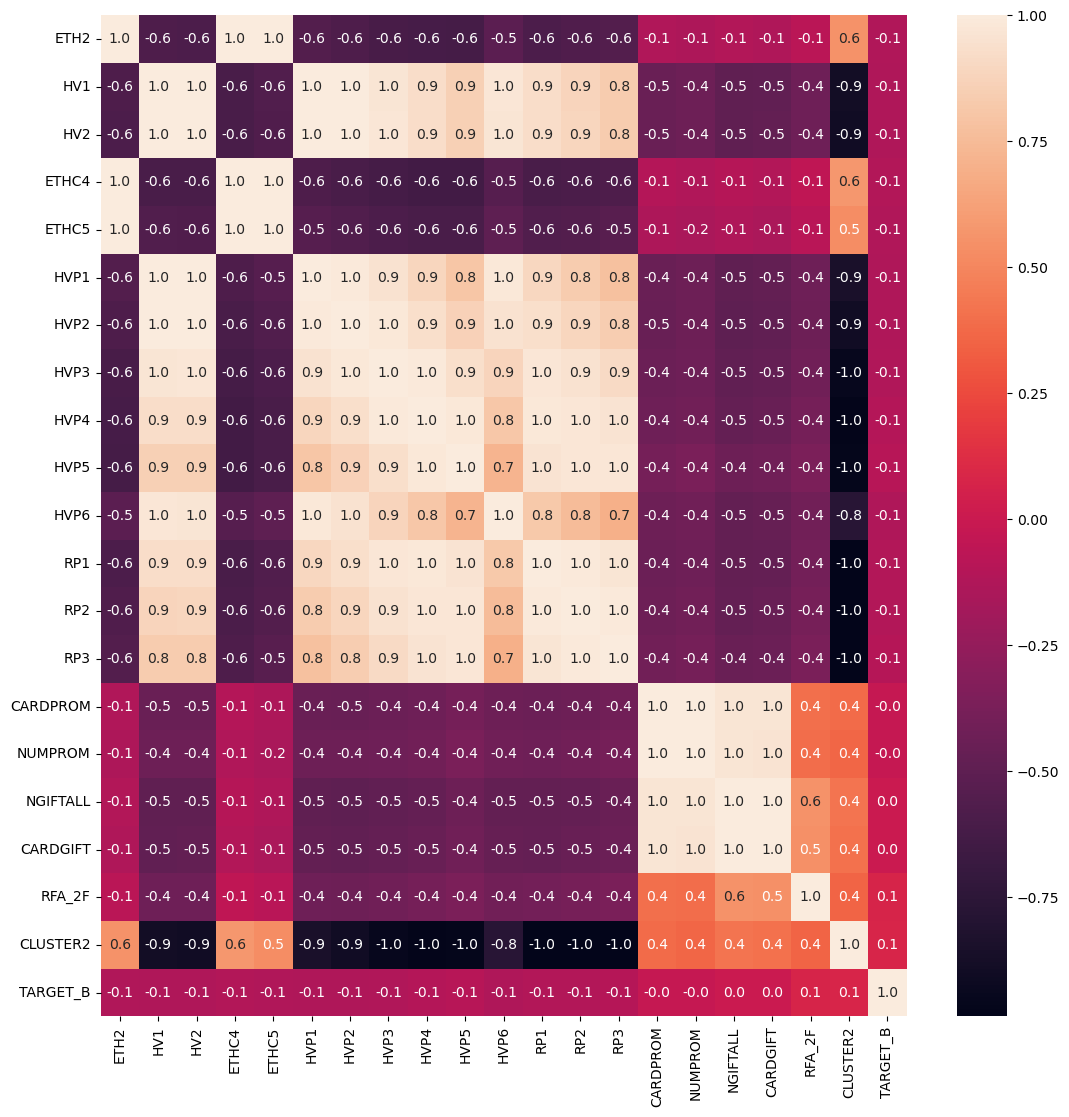

In [12]:
corr_matrix = df1_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(13,13))
ax = sns.heatmap(corr_matrix, annot=True,fmt='.1f')
plt.show()  

In [13]:
kbest = kbest.drop(columns=['HVP1','HVP2','HVP3','HVP4','HVP5','RP1','RP2','RP3','ETH2','ETHC5','ETHC4'], axis = 0)
kbest

,RFA_2F,CARDGIFT,HVP6,NGIFTALL,HV1,HV2,CARDPROM,NUMPROM,CLUSTER2
0,0.010101,0.079833,0.020202,0.000000,0.020202,0.050505,0.366492,0.127119,0.622951
1,0.000000,0.911333,0.979798,0.949495,0.919192,0.919192,0.146597,0.008475,0.000000
2,0.020202,0.082833,0.000000,0.000000,0.000000,0.020202,0.308901,0.110169,0.967213
3,0.000000,0.166667,0.101010,0.101010,0.010101,0.080808,0.324607,0.063559,0.655738
4,0.989899,0.096000,0.000000,0.000000,0.252525,0.585859,0.570681,0.152542,0.409836
...,...,...,...,...,...,...,...,...,...
95407,0.101010,0.164667,0.020202,0.000000,0.696970,0.848485,0.052356,0.000000,0.180328
95408,0.030303,0.279833,0.181818,0.050505,0.161616,0.262626,0.031414,0.000000,0.016393
95409,0.141414,0.062667,0.000000,0.000000,0.030303,0.343434,0.151832,0.025424,0.540984
95410,0.010101,0.403500,0.898990,0.090909,0.888889,0.888889,0.643979,0.169492,0.163934


In [14]:
df1_corr = df1_corr.drop(columns=['HVP1','HVP2','HVP3','HVP4','HVP5','RP1','RP2','RP3','ETH2','ETHC5','ETHC4'], axis = 0)
df1_corr

,HV1,HV2,HVP6,CARDPROM,NUMPROM,NGIFTALL,CARDGIFT,RFA_2F,CLUSTER2,TARGET_B
ETH2,-0.150722,-0.158032,-0.096166,-0.038738,-0.041903,-0.042072,-0.053205,-0.027754,0.166041,-0.019040
HV1,1.000000,0.993412,0.906695,-0.040233,-0.028284,-0.061483,-0.054503,-0.051548,-0.569699,0.025012
HV2,0.993412,1.000000,0.902442,-0.041306,-0.028821,-0.062982,-0.055636,-0.053175,-0.579342,0.025607
ETHC4,-0.170230,-0.178188,-0.112682,-0.039434,-0.042855,-0.039528,-0.051165,-0.023080,0.183307,-0.019885
ETHC5,-0.139150,-0.146567,-0.090180,-0.041689,-0.044525,-0.044839,-0.055530,-0.028703,0.143493,-0.018689
HVP1,0.924447,0.932601,0.872224,-0.033232,-0.022159,-0.052282,-0.046191,-0.048472,-0.484296,0.022948
HVP2,0.895115,0.911005,0.739174,-0.038125,-0.026664,-0.058279,-0.051686,-0.053117,-0.550035,0.023514
HVP3,0.812556,0.836047,0.569207,-0.042971,-0.031051,-0.063971,-0.056939,-0.053809,-0.643823,0.024175
HVP4,0.711825,0.736363,0.437640,-0.046988,-0.034902,-0.066199,-0.059040,-0.050463,-0.706313,0.024186
HVP5,0.554888,0.574134,0.290889,-0.042836,-0.031918,-0.057150,-0.050735,-0.039309,-0.681271,0.022034


#### Categorical Columns

In [15]:
categorical

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11.0
1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10.0
2,NC,43,U,M,3,L,E,C,R,2,90,1,0,2,91,11,92,7,95,12,90,1.0
3,CA,44,U,F,3,L,E,C,R,2,87,1,28,1,87,11,94,11,95,12,87,2.0
4,FL,16,H,F,3,L,F,A,S,2,86,1,20,1,93,10,96,1,96,1,79,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,96,1,0,2,96,2,96,2,96,2,96,2.0
95408,TX,24,H,M,3,L,F,A,C,1,96,1,50,1,96,3,96,3,96,3,96,3.0
95409,MI,30,H,M,3,L,E,B,C,3,95,1,38,1,96,3,95,1,96,10,94,10.0
95410,CA,24,H,F,2,L,F,A,C,1,86,1,40,5,90,11,96,8,97,1,86,12.0


Dropping these columns as their information isn't stated in the glossary and they aren't important to the dataset

In [16]:
categorical = categorical.drop(columns=['GEOCODE2','ODATEW_YR','ODATEW_MM','DOB_YR','DOB_MM','MINRDATE_YR','MINRDATE_MM','MAXRDATE_YR','MAXRDATE_MM','LASTDATE_YR','LASTDATE_MM','FIRSTDATE_YR','FIRSTDATE_MM'], axis = 0)

Reviewing the values counts to group the CLUSTER value counts together below a specific threshold

In [17]:
categorical['CLUSTER'].value_counts()

40    6295
35    3624
36    3617
27    3553
24    3539
49    3315
12    3000
18    2897
13    2706
30    2607
39    2601
45    2515
43    2385
11    2378
51    2322
14    2246
41    2176
44    1953
16    1947
2     1942
21    1891
8     1828
10    1804
46    1800
28    1630
17    1621
20    1568
53    1441
3     1428
34    1358
42    1358
23    1324
31    1285
22    1282
25    1275
38    1200
15    1173
1     1140
7     1076
5     1014
37     972
26     947
47     868
29     859
32     795
48     787
50     776
9      770
6      603
33     593
4      561
19     497
52     270
Name: CLUSTER, dtype: int64

In [18]:
df = pd.DataFrame(categorical['CLUSTER'].value_counts()).reset_index()

df.columns = ['cluster', 'count']
other_clusters = list(df[df['count']<2500]['cluster'])

def clean_cluster(x):
    if x in other_clusters:
        return 'other'
    else:
        return x

In [19]:
categorical['CLUSTER'] = list(map(clean_cluster, categorical['CLUSTER']))

In [20]:
categorical

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,DOMAIN_A,DOMAIN_B
0,IL,36,H,F,3,L,E,T,2
1,CA,other,H,M,3,L,G,S,1
2,NC,other,U,M,3,L,E,R,2
3,CA,other,U,F,3,L,E,R,2
4,FL,other,H,F,3,L,F,S,2
...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,2
95408,TX,24,H,M,3,L,F,C,1
95409,MI,30,H,M,3,L,E,C,3
95410,CA,24,H,F,2,L,F,C,1


Converting the categorical variables to strings

In [21]:
categorical = categorical.applymap(str)

Concatenating all of the values

In [22]:
all_data = pd.concat((categorical,kbest,targets),axis=1)
all_data.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,DOMAIN_A,DOMAIN_B,RFA_2F,CARDGIFT,HVP6,NGIFTALL,HV1,HV2,CARDPROM,NUMPROM,CLUSTER2,TARGET_B,TARGET_D
0,IL,36,H,F,3,L,E,T,2,0.010101,0.079833,0.020202,0.000000,0.020202,0.050505,0.366492,0.127119,0.622951,0,0.0
1,CA,other,H,M,3,L,G,S,1,0.000000,0.911333,0.979798,0.949495,0.919192,0.919192,0.146597,0.008475,0.000000,0,0.0
2,NC,other,U,M,3,L,E,R,2,0.020202,0.082833,0.000000,0.000000,0.000000,0.020202,0.308901,0.110169,0.967213,0,0.0
3,CA,other,U,F,3,L,E,R,2,0.000000,0.166667,0.101010,0.101010,0.010101,0.080808,0.324607,0.063559,0.655738,0,0.0
4,FL,other,H,F,3,L,F,S,2,0.989899,0.096000,0.000000,0.000000,0.252525,0.585859,0.570681,0.152542,0.409836,0,0.0


Dropping column TARGET_D for future use

In [23]:
data = all_data.drop(columns=['TARGET_D'], axis=1)

In [24]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [25]:
X = data.drop('TARGET_B',axis = 1)
y = data['TARGET_B']

#### Train-Test Split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1234)

In [27]:
X_t_imb = pd.DataFrame(X_train)
X_t_imb

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,DOMAIN_A,DOMAIN_B,RFA_2F,CARDGIFT,HVP6,NGIFTALL,HV1,HV2,CARDPROM,NUMPROM,CLUSTER2
75507,other,other,U,F,2,L,G,C,3,0.010101,0.097500,0.000000,0.000000,0.050505,0.252525,0.167539,0.025424,0.770492
43476,WA,13,H,F,3,L,F,S,1,0.000000,0.119833,0.020202,0.000000,0.212121,0.545455,0.366492,0.055085,0.295082
38015,FL,45,H,F,3,L,E,R,2,0.080808,0.099333,0.020202,0.000000,0.010101,0.050505,0.345550,0.101695,0.918033
73875,MI,other,U,M,3,L,D,R,3,0.000000,0.049833,0.000000,0.000000,0.000000,0.000000,0.277487,0.063559,0.950820
88838,NC,30,H,F,3,L,D,C,3,0.323232,0.067333,0.000000,0.000000,0.000000,0.020202,0.549738,0.220339,0.868852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89460,other,45,U,F,3,L,F,R,2,0.000000,0.050167,0.000000,0.000000,0.010101,0.010101,0.335079,0.042373,0.950820
60620,CA,13,H,F,3,L,F,S,1,0.000000,0.779833,0.979798,0.898990,0.858586,0.929293,0.183246,0.025424,0.016393
34086,FL,other,H,F,3,L,F,C,1,0.000000,0.345833,0.515152,0.323232,0.888889,0.898990,0.251309,0.012712,0.196721
58067,CA,35,H,F,3,L,F,T,1,0.000000,0.311500,0.383838,0.040404,0.414141,0.494949,0.214660,0.016949,0.180328


In [28]:
trainset = pd.concat((X_train,y_train),axis=1)
trainset

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,DOMAIN_A,DOMAIN_B,RFA_2F,CARDGIFT,HVP6,NGIFTALL,HV1,HV2,CARDPROM,NUMPROM,CLUSTER2,TARGET_B
75507,other,other,U,F,2,L,G,C,3,0.010101,0.097500,0.000000,0.000000,0.050505,0.252525,0.167539,0.025424,0.770492,0
43476,WA,13,H,F,3,L,F,S,1,0.000000,0.119833,0.020202,0.000000,0.212121,0.545455,0.366492,0.055085,0.295082,0
38015,FL,45,H,F,3,L,E,R,2,0.080808,0.099333,0.020202,0.000000,0.010101,0.050505,0.345550,0.101695,0.918033,0
73875,MI,other,U,M,3,L,D,R,3,0.000000,0.049833,0.000000,0.000000,0.000000,0.000000,0.277487,0.063559,0.950820,1
88838,NC,30,H,F,3,L,D,C,3,0.323232,0.067333,0.000000,0.000000,0.000000,0.020202,0.549738,0.220339,0.868852,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89460,other,45,U,F,3,L,F,R,2,0.000000,0.050167,0.000000,0.000000,0.010101,0.010101,0.335079,0.042373,0.950820,0
60620,CA,13,H,F,3,L,F,S,1,0.000000,0.779833,0.979798,0.898990,0.858586,0.929293,0.183246,0.025424,0.016393,0
34086,FL,other,H,F,3,L,F,C,1,0.000000,0.345833,0.515152,0.323232,0.888889,0.898990,0.251309,0.012712,0.196721,0
58067,CA,35,H,F,3,L,F,T,1,0.000000,0.311500,0.383838,0.040404,0.414141,0.494949,0.214660,0.016949,0.180328,0


In [29]:
trainset['TARGET_B'].value_counts()

0    54299
1     2948
Name: TARGET_B, dtype: int64

#### Undersampling/Downsampling train set

In [30]:
from sklearn.utils import resample

category_0 = trainset[trainset['TARGET_B'] == 0]
category_1 = trainset[trainset['TARGET_B'] == 1]

In [31]:
category_0_undersampled = resample(category_0, 
                                   replace=False, 
                                   n_samples = len(category_1))

In [32]:
category_1.shape

(2948, 19)

In [33]:
category_0_undersampled.shape

(2948, 19)

In [34]:
train_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)
train_downsampled.shape

(5896, 19)

In [35]:
train_downsampled['TARGET_B'].value_counts()

0    2948
1    2948
Name: TARGET_B, dtype: int64

In [36]:
X_train = train_downsampled.drop('TARGET_B',axis = 1)
y_train = train_downsampled['TARGET_B']

In [37]:
#changing the test and train values to numerical and test and train cat to categorical
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

MinMax Scaling again

In [38]:
transformer = MinMaxScaler().fit(X_train_num)
x_train_scaled = transformer.transform(X_train_num)
x_test_scaled = transformer.transform(X_test_num)
print(x_train_scaled.shape)
print(x_test_scaled.shape)
x_test_scaled = pd.DataFrame(x_test_scaled)
x_train_scaled = pd.DataFrame(x_train_scaled)

(5896, 9)
(38165, 9)


OneHot encoding the categorical variables

In [39]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown ='error',drop='first').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_cat_encoded = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)
X_train_cat_encoded.head()

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_13,CLUSTER_18,CLUSTER_24,CLUSTER_27,CLUSTER_30,CLUSTER_35,CLUSTER_36,CLUSTER_39,CLUSTER_40,CLUSTER_45,CLUSTER_49,CLUSTER_other,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [40]:
encoder_test_cat = encoder.transform(X_test_cat)
cols = encoder.get_feature_names_out(input_features=X_test_cat.columns)
X_test_cat = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)
X_test_cat.head()

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_13,CLUSTER_18,CLUSTER_24,CLUSTER_27,CLUSTER_30,CLUSTER_35,CLUSTER_36,CLUSTER_39,CLUSTER_40,CLUSTER_45,CLUSTER_49,CLUSTER_other,HOMEOWNR_U,GENDER_M,GENDER_other,DATASRCE_2,DATASRCE_3,RFA_2A_E,RFA_2A_F,RFA_2A_G,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Concatenating the train and test dataframes

In [41]:
train_transformed = pd.concat((X_train_cat_encoded,x_train_scaled),axis =1)
test_transformed = pd.concat((X_test_cat,x_test_scaled),axis =1)

#### Logistic Regression model

In [42]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(train_transformed, y_train)
LR.score(test_transformed, y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.5942879601729333

In [43]:
pred = LR.predict(test_transformed)
from sklearn.metrics import confusion_matrix #true neg + true pos/all pred
confusion_matrix(y_test,pred) #true negatives make up most of the ratio for this outcome

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[21657, 14613],
       [  871,  1024]])

In [44]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


print("precision: ",precision_score(y_test,pred))    # true pos / true pos+false pos = low precision score.
print("recall: ",recall_score(y_test,pred))    #recall is most important, true pos/true pos + false neg
print("f1: ",f1_score(y_test,pred))

precision:  0.06548570697704163
recall:  0.5403693931398417
f1:  0.11681496691763635


*Precision score*: There is a low precision score, therefore score in how many people donated is quite low

*Recall score*: 54% of people would have donated out of the features we use